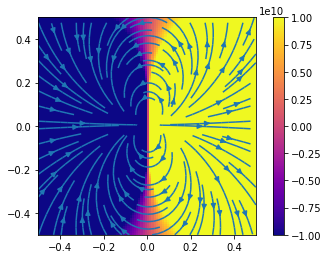

In [2]:
from numpy import exp, zeros, meshgrid, linspace
from pylab import imshow, show, colorbar, quiver, streamplot
from math import sqrt
Vmax = 1e10
Emax = 4e10
k = 8.99e9 #Nm^2/C^2
q = 10.0 #Coulombs

x1 = 0.05
y1 = 0.0
x2 = -0.05
y2 = 0.0

def f1(x,y):
    if sqrt((x-x1)**2 + (y-y1)**2) == 0:
        return float('inf')
    return (k*q)/sqrt((x-x1)**2 + (y-y1)**2)

def f2(x,y):
    if sqrt((x-x2)**2 + (y-y2)**2) == 0:
        return float('inf')
    return -(k*q)/sqrt((x-x2)**2 + (y-y2)**2)
    
# constants
L = 1.0                     # size of square 100 cm, i.e. 1 m
N = 100                     # number of grid points on a side 100 points
a = L/N                     # grid point spacing, each point spaced by 1 cm
width = 0.2                 # width of concentration profile
Z = zeros([N,N], float)     # empty matrix for height
DX = zeros([N,N], float)    # empty matrix for gradient
DY = zeros([N,N], float)    # empty matrix for gradient

# calculate height profile
for i in range(N):
    y = -L/2 + i*a
    
    for j in range(N):
        x = -L/2 + j*a
        
        Z[i,j] = f1(x,y)+f2(x,y)

for i in range(N):
    for j in range(N):
        
        # calculate x component
        if j == 0:
            DX[i,j] = -(Z[i,j+1] - Z[i,j])/a       # forward difference
        elif j == N-1:
            DX[i,j] = -(Z[i,j] - Z[i,j-1])/a       # backward difference
        else:
            DX[i,j] = -(Z[i,j+1] - Z[i,j-1])/(2*a) # central difference
            
        # calculate y component
        if i == 0:
            DY[i,j] = -(Z[i+1,j] - Z[i,j])/a       # forward difference
        elif i == N-1:
            DY[i,j] = -(Z[i,j] - Z[i-1,j])/a       # backward difference
        else:
            DY[i,j] = -(Z[i+1,j] - Z[i-1,j])/(2*a) # central difference

            
# set up vector plot
X,Y = meshgrid(linspace(-L/2, L/2, N), linspace(-L/2, L/2, N))
# plot
imshow(Z, extent=[-L/2, L/2, -L/2, L/2], cmap="plasma", vmax=Vmax, vmin=-Vmax)        
colorbar()
streamplot(X,Y,DX,DY, maxlength=1)
show()
